# Bike Sharing Demand

## Introduction
In the following project we'll predict bike rental demand in the Capital Bikeshare program in Washington, D.C using historical weather data from the Bike Sharing Demand dataset available through Kaggle. For this purpose, we will be using the random forests algorithm.

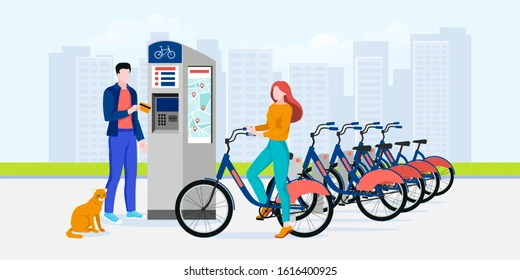

In [4]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error as MSE

## Dataset

In [5]:
df_bikes = pd.read_csv('bikes.csv')
print(df_bikes)

      hr  holiday  workingday  temp   hum  windspeed  cnt  instant  mnth  yr  \
0      0        0           0  0.76  0.66     0.0000  149    13004     7   1   
1      1        0           0  0.74  0.70     0.1343   93    13005     7   1   
2      2        0           0  0.72  0.74     0.0896   90    13006     7   1   
3      3        0           0  0.72  0.84     0.1343   33    13007     7   1   
4      4        0           0  0.70  0.79     0.1940    4    13008     7   1   
...   ..      ...         ...   ...   ...        ...  ...      ...   ...  ..   
1483  19        0           1  0.80  0.49     0.1343  452    14487     8   1   
1484  20        0           1  0.80  0.49     0.1343  356    14488     8   1   
1485  21        0           1  0.76  0.58     0.1940  303    14489     8   1   
1486  22        0           1  0.76  0.58     0.1940  277    14490     8   1   
1487  23        0           1  0.74  0.62     0.1045  174    14491     8   1   

      Clear to partly cloudy  Light Pre

In [21]:
sns.set_palette("rocket")

## Data Visualization

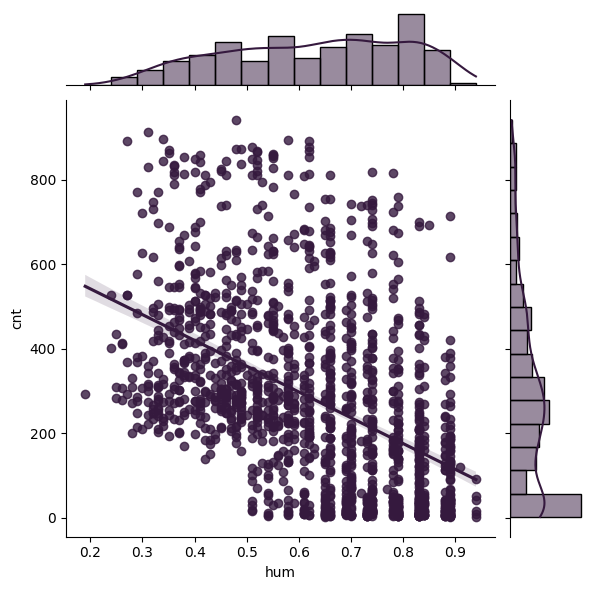

<Figure size 640x480 with 0 Axes>

In [22]:
# Create a jointplot similar to the JointGrid
sns.jointplot(x="hum",
        y="cnt",
        kind='reg',
        data=df_bikes)

plt.show()
plt.clf()

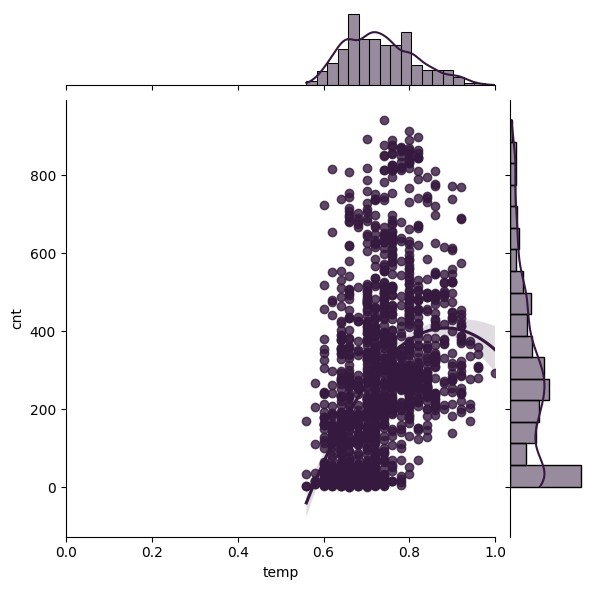

<Figure size 640x480 with 0 Axes>

In [25]:
# Plot temp vs. total_rentals as a regression plot
sns.jointplot(x="temp",
         y="cnt",
         kind='reg',
         data=df_bikes,
         order=2,
         xlim=(0, 1)
         )

plt.show()
plt.clf()

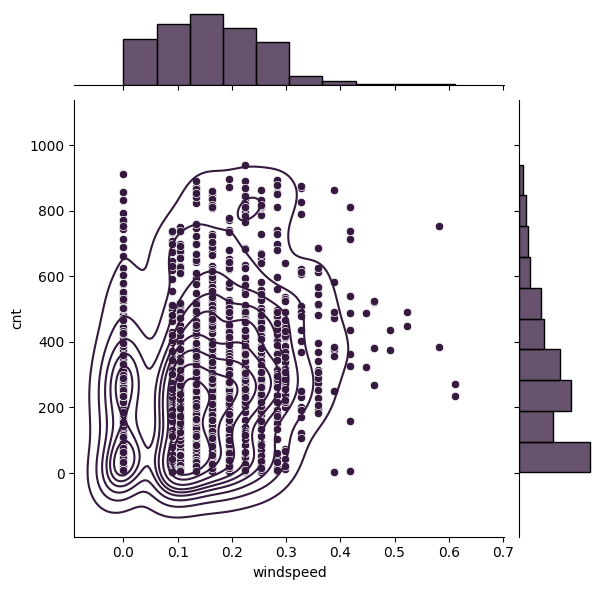

<Figure size 640x480 with 0 Axes>

In [28]:
# Replicate the above plot but only for registered riders
g = sns.jointplot(x="windspeed",
             y="cnt",
             kind='scatter',
             data=df_bikes,
             marginal_kws=dict(bins=10))
g.plot_joint(sns.kdeplot)

plt.show()
plt.clf()

## Train/Test split

In [ ]:
X = df_bikes.drop(['cnt'], axis=1)
y = df_bikes[['cnt']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# Instantiate RandomForest Model

In [ ]:
# Instantiate rf
rf = RandomForestRegressor(n_estimators=25, random_state=2)

# Fit to the training data
rf.fit(X_train, y_train)

<ipython-input-7-2791df2ad065>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestRegressor(n_estimators=25, random_state=2)

## Evaluate rf

In [ ]:
# Predict on test data
y_pred = rf.predict(X_test)

# Evaluate the test
rmse_test = MSE(y_test, y_pred) ** (1/2)

print('Test set RMSE of rf: {:.3f}'.format(rmse_test))

Test set RMSE of rf: 50.424


## Result
The test set RMSE achieved by rf is significantly smaller than that achieved by a single CART!

## Feature importance

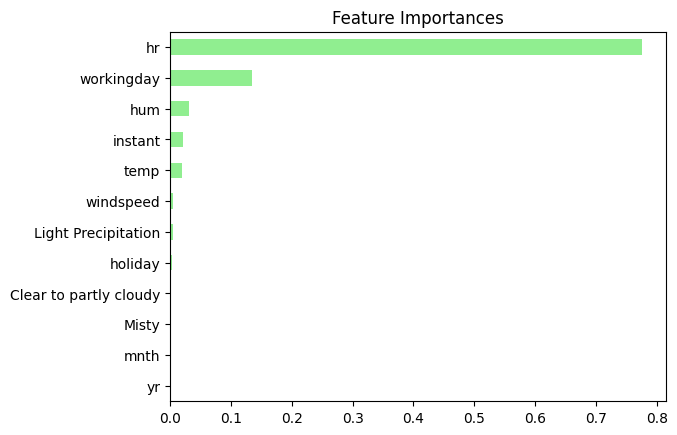

In [ ]:
# Create a pd.Series of features importance
importances = pd.Series(data=rf.feature_importances_, index=X_train.columns)

# sort importances
importances_sorted = importances.sort_values()

# Barplot
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Feature Importances')
plt.show()

## Gradient Boosing regressor

In [ ]:
# Instantiate GB
gb = GradientBoostingRegressor(max_depth=4, n_estimators=200, random_state=2)

# Fit
gb.fit(X_train, y_train)

# Predict
y_pred = gb.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Evaluate gb

In [ ]:
# MSE
mse_test = MSE(y_test, y_pred)

# RMSE
rmse_test = mse_test ** (1/2)

print('Test set RMSE of gb: {:.3f}'.format(rmse_test))

Test set RMSE of gb: 50.340


## Stochastic Gradient Boosting Regressor

In [ ]:
# Instantiate sgbr
sgbr = GradientBoostingRegressor(max_depth=4,
            subsample=0.9,
            max_features=0.75,
            n_estimators=200,
            random_state=2)

# Fit sgbr to the training set
sgbr.fit(X_train, y_train)

# Predict test set labels
y_pred = sgbr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Evaluate sgbr

In [ ]:
# Compute test set MSE
mse_test = MSE(y_test, y_pred)

# Compute test set RMSE
rmse_test = mse_test ** (0.5)

# Print rmse_test
print('Test set RMSE of sgbr: {:.3f}'.format(rmse_test))

Test set RMSE of sgbr: 50.294


## Hyperparameter grid of rf

In [ ]:
# Define the dictionary 'params_rf'
params_rf = {"n_estimators":[100, 350, 500], 'max_features': ['log2', 'auto', 'sqrt'], 'min_samples_leaf': [2, 10, 30]}

In [ ]:
# Instantiate grid_rf
grid_rf = GridSearchCV(estimator=rf, param_grid=params_rf, scoring='neg_mean_squared_error', cv=3, verbose=1, n_jobs=-1)

grid_rf.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


GridSearchCV(cv=3,
             estimator=RandomForestRegressor(n_estimators=25, random_state=2),
             n_jobs=-1,
             param_grid={'max_features': ['log2', 'auto', 'sqrt'],
                         'min_samples_leaf': [2, 10, 30],
                         'n_estimators': [100, 350, 500]},
             scoring='neg_mean_squared_error', verbose=1)

## Evaluate optimal forest

In [ ]:
# Best estimator
best_model = grid_rf.best_estimator_

# Predict
y_pred = best_model.predict(X_test)

# Compute rmse_test
rmse_test = MSE(y_test, y_pred) ** (1/2)

# Print rmse_test
print('Test RMSE of best model: {:.3f}'.format(rmse_test))

Test RMSE of best model: 47.950
